In [1]:
#please uncomment and run the following line only once in case you don't 
#have the library "names" installed (works perfectly on anaconda):

#!pip install names

In [2]:
import random #for assigning random passengers
import names #a library to give passengers names
import sys, os # To disable print statements when needed
import matplotlib.pyplot as plt #for plotting

In [3]:
# the class for the building:
class Building():
    def __init__(self, n_floors, n_passengers, our_passengers):
        self.n_floors = n_floors #number of floors
        self.n_passengers = n_passengers #number of passengers
        self.our_passengers = our_passengers #a list that contains objects from the class "passengers"
   
    #the following function prints the details of the passengers so we can track the simulation
    def print_passengers(self):
        for passenger in self.our_passengers:
            print(f"{passenger.name} at floor {passenger.current_floor} and needs to go to floor {passenger.destination}")
        
        
#the class for the elevator
class Elevator():
    def __init__(self, capacity, elevator_floor=1, elevator_state = "Going Up"):
        self.capacity = capacity #maximum capcaity of the elevator
        self.current_floor = elevator_floor #the floor at which the elevator is at
        self.elevator_state = elevator_state #to tell whether it's moving up or down
        self.Elevator_passengers = [] #list of objects from the class "Passengers"
        self.up_direction = [] #list of the floors the elevator will visit while going up
        self.down_direction = []#list of the floors the elevator will visit while going down
        #number of movement the elevator makes for each strategy(moving 1 floor = 1 step):
        self.strategy1_steps=0 
        self.strategy2_steps=0
        self.wait_list = []#people who will wait when elevator is out of capacity
    
    #method to move elevator for strategy 1
    def move_elevator(self, max_floor):
        self.strategy1_steps+=1 #moving 1 floor = 1 step
        print(f"step.{self.strategy1_steps}:")
        if self.Elevator_passengers: #if the elevator has passengers, print their names
            print(f"elevator is at {self.current_floor} and is {self.elevator_state} while carrying"
                  f"{[i.name for i in self.Elevator_passengers]}")
        else: #if not, print that it's empty
            print(f"elevator is at {self.current_floor} and is {self.elevator_state} while empty")
        
        #the following implements the given strategy which makes the elevator
        #moves all the way up until max_floor and then all the way down
        if self.elevator_state == "Going Up":
            self.current_floor +=1 #update the floor of the elevator as it moves
            if self.current_floor == max_floor: #once it reaches max_floor, go down
                self.elevator_state = "Going Down"

        elif self.elevator_state == "Going Down":
            self.current_floor -=1 #update the floor of the elevator
            if self.current_floor == 1:
                self.elevator_state = "Going Up"
                
    # a method to move elevator for strategy 2:
    def move_elevator2(self, destination):
        if destination == self.current_floor: #print where elevator is
            print(f"Elevator is at floor {destination}")
        elif destination > self.current_floor: #if elevator is going up:
            self.strategy2_steps+=1 #moving 1 floor = 1 step
            print(f"Step.{self.strategy2_steps}:")
            if self.Elevator_passengers: #if elevator has passengers, print their names
                print(f"Elevator is moving up towards floor {destination} while carrying" \
                      f"{[i.name for i in self.Elevator_passengers]}")
            else: #if not, print that it's empty
                print(f"Elevator is moving up towards floor {destination} while empty")
            print(f"Elevator arrived to floor {destination}")
            self.current_floor = destination #update the floor of the elevator
        else: #if elevator is going down:
            self.strategy2_steps+=1
            print(f"Step.{self.strategy2_steps}:")
            if self.Elevator_passengers:
                print(f"Elevator is moving down towards floor {destination} while carrying" \
                      f"{[i.name for i in self.Elevator_passengers]}")
            else:
                print(f"Elevator is moving down towards floor {destination} while empty")
            
            print(f"Elevator arrived to floor {destination}")
            self.current_floor = destination
        
#the class for passengers:
class Passenger():
    def __init__(self, name, max_floor):
        self.name = name #name of the passenger taken from the library names
        self.current_floor = random.randint(1, max_floor)#randomly assign where they start
        #make sure that they go to a different floor from where they started(randomly):
        s = [i for i in range(1,max_floor+1)]#all possible floors
        s.remove(self.current_floor)#to make sure they go to a new floor
        self.destination = random.choice(s)#random choose the floor they go to

In [4]:
#This is the example strategy given to us:
def strategy1(max_floor):
    print("\nStarting the Elevator: \n")
    #the code will keep going untill all passengers have been delivered.
    #this will happen when the passengers lists in the elevator and in the building
    #are empty. so after delivering one passenger, they will be removed from the lists:
    while Happiness_Building.our_passengers or Building_Elevator.Elevator_passengers :
        current_floor = Building_Elevator.current_floor
        #Unloading passengers from the elevator 
        if Building_Elevator.Elevator_passengers:#only if there are any passengers in the elevator
            elevator_copy = Building_Elevator.Elevator_passengers.copy()#making a copy to
            #make sure that the for loop will keep going even if I delete an item from the list
            #inside the loop
            for passenger in elevator_copy:
                if passenger.destination == current_floor:#if he arrived, remove him:
                    print(f"elevator is at {current_floor} and {passenger.name} is getting off")
                    Building_Elevator.Elevator_passengers.remove(passenger)

        #loading passengers to the elevator:
        building_copy = Happiness_Building.our_passengers.copy()
        for passenger in building_copy:
            if passenger.current_floor == current_floor:#if elevator arrived to them, load them
                #only if there is a space:
                if len(Building_Elevator.Elevator_passengers) < Building_Elevator.capacity:
                    print(f"elevator is at {current_floor} and {passenger.name} is getting in the elevator")
                    Building_Elevator.Elevator_passengers.append(passenger)
                    Happiness_Building.our_passengers.remove(passenger)#remove from building because
                    #they are in the elevator list now
                else:#if there is no capacity, they wait:
                    print(f"elevator is at {current_floor} but {passenger.name} has"\
                          "to wait because elevator is full capacity ")
        #if we still have more passengers, we move the elevator again:
        if Happiness_Building.our_passengers or Building_Elevator.Elevator_passengers:
            Building_Elevator.move_elevator(max_floor)
            
    print("\n Mission Done!!")                  


#The new strategy (strategy 2) which gets elevator to move in one direction until
#all requests in that direction are satisfied.

#this function is fill the two lists "up_direction" and "down_direction" of the elevator. 
#they tell the elevator which floors to go to first. The elevator visits all the floors in
#"up_direction" first and then visits the floors in "down_direction"
def set_tasks(listt):
    Building_Elevator.up_direction = []
    Building_Elevator.down_direction=[]
    #if the passenger will be picked up AND dropped in the direction the elevator is taking (up since it starts from 1)
    for passenger in listt:
        if passenger.current_floor >= Building_Elevator.current_floor and passenger.destination >passenger.current_floor:
            Building_Elevator.up_direction.append(passenger.current_floor)
            Building_Elevator.up_direction.append(passenger.destination)
        else:#if passenger requests a change in the direction, they join the down list:
            Building_Elevator.down_direction.append(passenger.current_floor)
            Building_Elevator.down_direction.append(passenger.destination)
    
    #get rid of duplicate floors because we need to visit the floor once and
    #sort the floors:
    Building_Elevator.up_direction = list(set(Building_Elevator.up_direction))
    Building_Elevator.up_direction.sort()
    
    Building_Elevator.down_direction = list(set(Building_Elevator.down_direction))
    Building_Elevator.down_direction.sort(reverse = True)
    return Building_Elevator.up_direction, Building_Elevator.down_direction

#This function will use the two lists we made above to implement strategy 2:
def strategy2():
    set_tasks(Happiness_Building.our_passengers)#make the floors lists
    print("\nStarting Elevator from floor 1: \n")
    while Happiness_Building.our_passengers or Building_Elevator.Elevator_passengers:

        #While the elevator is in the first direction (UP):
        for floor in Building_Elevator.up_direction:
            Building_Elevator.move_elevator2(floor)#move to each floor in the up list
            
            #unload any passengers if they need this floor:
            for passenger in Building_Elevator.Elevator_passengers.copy():
                if passenger.destination == floor:
                    print(f"{passenger.name} is getting off the elevator")
                    Building_Elevator.Elevator_passengers.remove(passenger)#remove after unloading
            
            #load any passengers in that floor:
            for passenger in Happiness_Building.our_passengers.copy():
                if passenger.current_floor== floor:
                    if len(Building_Elevator.Elevator_passengers) < Building_Elevator.capacity:
                        print(f"{passenger.name} is getting in the elevator")
                        Building_Elevator.Elevator_passengers.append(passenger)
                        Happiness_Building.our_passengers.remove(passenger)#remove from the building list
                        #because they are in the elevator list
                    else:#incase there is no capacity, they wait:
                        print(f'{passenger.name} has to wait because elevator is full capacity')
                        if passenger not in Building_Elevator.wait_list:
                            Building_Elevator.wait_list.append(passenger)

        #While the elevator is in the first direction (DOWN):
        for floor in Building_Elevator.down_direction:
            Building_Elevator.move_elevator2(floor)
            #unload passengers:
            for passenger in Building_Elevator.Elevator_passengers.copy():
                if passenger.destination == floor:
                    print(f"{passenger.name} is getting off the elevator")
                    Building_Elevator.Elevator_passengers.remove(passenger)

            #load passengers:
            for passenger in Happiness_Building.our_passengers.copy():
                    if passenger.current_floor== floor:
                        if len(Building_Elevator.Elevator_passengers) < Building_Elevator.capacity:
                            print(f"{passenger.name} is getting in the elevator")
                            Building_Elevator.Elevator_passengers.append(passenger)
                            Happiness_Building.our_passengers.remove(passenger)
                        else:#no capacity, you wait:
                            print(f'{passenger.name} has to wait because elevator is full capacity')
                            if passenger not in Building_Elevator.wait_list:
                                Building_Elevator.wait_list.append(passenger)
        
        #if we have anyone waiting, then once the elevator gets free space,
        #it repreats the steps above but only for the waiting people:
        if Building_Elevator.wait_list:
            set_tasks(Building_Elevator.wait_list)#get new up and down floors list for the waiting people
            Building_Elevator.wait_list = []#removing the people from the waiting list

    print("\nMission Done!!")

#the folling function will generate a set of randomly assigned passengers to be used for
#the two strategies. random.seeds will be added to make sure we get the same set for
#the two strategies.
def set_random_passengers(n_passengers, max_floor, elevator_capacity, seeds):
    random.seed(seeds) 
    #get a building object with the following initial values:
    Happiness_Building = Building(max_floor, n_passengers,
                              [Passenger(names.get_first_name(), max_floor) for i in range(n_passengers)])
    Building_Elevator = Elevator(elevator_capacity)#elevator object
    Happiness_Building.print_passengers()#print passengers info for tracking
    return Happiness_Building, Building_Elevator
    

#the following function will be used when we don't need the print outputs:
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')
    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [5]:
#enter the values you need:
seeds = 1
n_passengers= int(input("Please enter the number of passengers"))
max_floor= int(input("Please enter the number of floors"))
elevator_capacity= int(input("Please enter the capcaity of the elevator"))

Please enter the number of passengers5
Please enter the number of floors5
Please enter the capcaity of the elevator3


In [6]:
#implementing strategy 1:
Happiness_Building, Building_Elevator = set_random_passengers(n_passengers, max_floor, elevator_capacity, seeds=1)
strategy1(max_floor)

Nicholas at floor 1 and needs to go to floor 4
Peter at floor 4 and needs to go to floor 5
Adrienne at floor 1 and needs to go to floor 5
Blake at floor 4 and needs to go to floor 5
Jeffery at floor 3 and needs to go to floor 2

Starting the Elevator: 

elevator is at 1 and Nicholas is getting in the elevator
elevator is at 1 and Adrienne is getting in the elevator
step.1:
elevator is at 1 and is Going Up while carrying['Nicholas', 'Adrienne']
step.2:
elevator is at 2 and is Going Up while carrying['Nicholas', 'Adrienne']
elevator is at 3 and Jeffery is getting in the elevator
step.3:
elevator is at 3 and is Going Up while carrying['Nicholas', 'Adrienne', 'Jeffery']
elevator is at 4 and Nicholas is getting off
elevator is at 4 and Peter is getting in the elevator
elevator is at 4 but Blake hasto wait because elevator is full capacity 
step.4:
elevator is at 4 and is Going Up while carrying['Adrienne', 'Jeffery', 'Peter']
elevator is at 5 and Adrienne is getting off
elevator is at 5 and

In [7]:
#implementing strategy 2:
Happiness_Building, Building_Elevator = set_random_passengers(n_passengers, max_floor, elevator_capacity, seeds=1)
strategy2()

Nicholas at floor 1 and needs to go to floor 4
Peter at floor 4 and needs to go to floor 5
Adrienne at floor 1 and needs to go to floor 5
Blake at floor 4 and needs to go to floor 5
Jeffery at floor 3 and needs to go to floor 2

Starting Elevator from floor 1: 

Elevator is at floor 1
Nicholas is getting in the elevator
Adrienne is getting in the elevator
Step.1:
Elevator is moving up towards floor 4 while carrying['Nicholas', 'Adrienne']
Elevator arrived to floor 4
Nicholas is getting off the elevator
Peter is getting in the elevator
Blake is getting in the elevator
Step.2:
Elevator is moving up towards floor 5 while carrying['Adrienne', 'Peter', 'Blake']
Elevator arrived to floor 5
Adrienne is getting off the elevator
Peter is getting off the elevator
Blake is getting off the elevator
Step.3:
Elevator is moving down towards floor 3 while empty
Elevator arrived to floor 3
Jeffery is getting in the elevator
Step.4:
Elevator is moving down towards floor 2 while carrying['Jeffery']
Eleva

In [8]:
#comparing the two strategies over a different number of passengers:
max_floor=20 #a building of 20 floors
elevator_capacity=15 #an elevator with a capacity of 15 people
#Lists to store the number of steps for different # of passengers for the two strategies:
strategy1_steps_number = [] 
strategy2_steps_number = []

for n_passengers in range(70): #differnet # of passengers:
    strategy1_steps_average = 0
    strategy2_steps_average = 0
    for seeds in range(10):#use different set of random passengers and take the average to avoid noise in graping
        with HiddenPrints(): #to prevent the function from printing
            Happiness_Building, Building_Elevator = set_random_passengers(n_passengers, max_floor, elevator_capacity, seeds)
            strategy1(max_floor)
        strategy1_steps_average+=Building_Elevator.strategy1_steps
         
        with HiddenPrints(): 
            Happiness_Building, Building_Elevator = set_random_passengers(n_passengers, max_floor, elevator_capacity, seeds)
            strategy2()
        strategy2_steps_average+=Building_Elevator.strategy2_steps
        
    strategy1_steps_number.append(strategy1_steps_average/10)
    strategy2_steps_number.append(strategy2_steps_average/10)
    

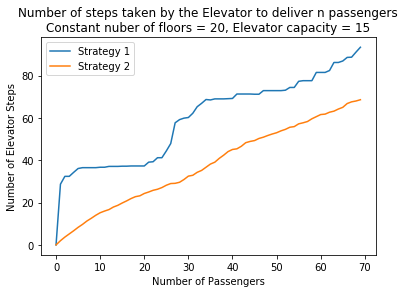

In [9]:
#make a plot for comparison:
n_passengers = [i for i in range(70)]
plt.plot(n_passengers,strategy1_steps_number, label = "Strategy 1" )
plt.plot(n_passengers,strategy2_steps_number, label = "Strategy 2" )
plt.legend()
plt.xlabel("Number of Passengers")
plt.ylabel("Number of Elevator Steps")
plt.title("Number of steps taken by the Elevator to deliver n passengers"
          "\nConstant nuber of floors = 20, Elevator capacity = 15")

plt.show()

In [10]:
#comparing the two strategies over different number of floors:
n_passengers=20 #a building of 20 passengers
elevator_capacity=15 #an elevator with a capacity of 15 people
#Lists to store the number of steps for different # of passengers for the two strategies:
strategy1_steps_number = [] 
strategy2_steps_number = []

for max_floor in range(5,70): #differnet # of passengers:
    strategy1_steps_average = 0
    strategy2_steps_average = 0
    for seeds in range(10):#use different set of random passengers and take the average to avoid noise in graping
        with HiddenPrints(): #to prevent the function from printing
            Happiness_Building, Building_Elevator = set_random_passengers(n_passengers, max_floor, elevator_capacity, seeds)
            strategy1(max_floor)
        strategy1_steps_average+=Building_Elevator.strategy1_steps
         
        with HiddenPrints(): 
            Happiness_Building, Building_Elevator = set_random_passengers(n_passengers, max_floor, elevator_capacity, seeds)
            strategy2()
        strategy2_steps_average+=Building_Elevator.strategy2_steps
        
    strategy1_steps_number.append(strategy1_steps_average/10)
    strategy2_steps_number.append(strategy2_steps_average/10)
    

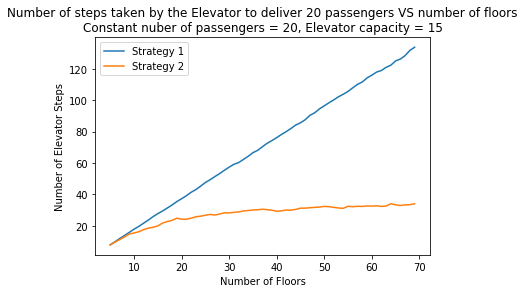

In [11]:
#make a plot for comparison:
max_floor = [i for i in range(5,70)]
plt.plot(max_floor,strategy1_steps_number, label = "Strategy 1" )
plt.plot(max_floor,strategy2_steps_number, label = "Strategy 2" )
plt.legend()
plt.xlabel("Number of Floors")
plt.ylabel("Number of Elevator Steps")
plt.title("Number of steps taken by the Elevator to deliver 20 passengers VS number of floors"
          "\nConstant nuber of passengers = 20, Elevator capacity = 15")

plt.show()